In [3]:
#import libraries

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

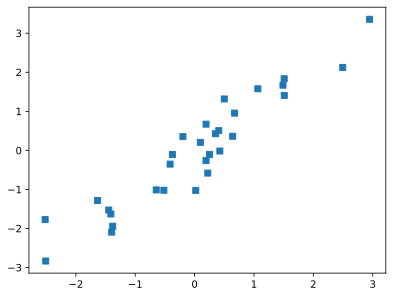

In [6]:
#create data

N = 30
x = torch.randn(N,1)
y = x+torch.randn(N,1)/2
plt.plot(x,y,'s')


In [7]:
#build model
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.ReLU(),
    nn.Linear(1, 1)
)

model


Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [8]:
#metaparameters setup

#learning rate
learningRate = 0.05

#loss function
lossFun = nn.MSELoss()

#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)



In [10]:
#train the model

num_epochs = 500
losses = torch.zeros(num_epochs)

for i in range(num_epochs):
  #forward pass
  yHat = model(x)
  loss = lossFun(yHat, y)
  losses[i] = loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0, 0.5, 'Loss')

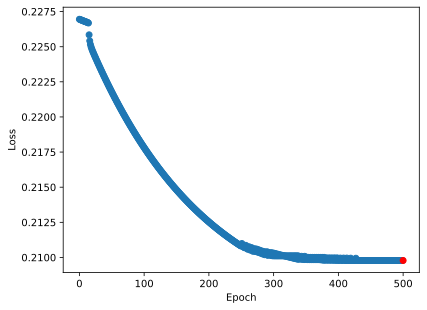

In [16]:
#show the losses

#manually compute losses
#final forwrd pass

yFinal = model(x)

#Final loss (Mean Squared Error)
testloss = (yFinal-y).pow(2).mean()
plt.plot(losses.detach(), 'o')
plt.plot(num_epochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0.5, 1.0, 'Prediction Data')

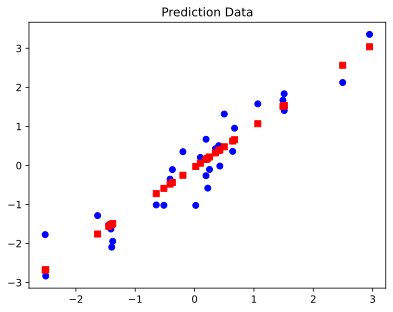

In [18]:
#plot the data
plt.plot(x,y,'bo',label="Real Data")
plt.plot(x, yFinal.detach(), 'rs', label="Predictions")
plt.title("Prediction Data")